Analysed a panel dataset of 840 UK firm-year observations to assess the impact of board gender diversity on financial performance. 
Developed OLS regression models using robust standard errors to correct for heteroskedasticity and ensure valid inferences
Pinpointed a statistically significant, non-linear relationship, finding that firm performance (Tobin's Q) peaked with 17% female board representation.


In [1]:
# Import all required libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import os

# --- Create Output directory (corresponds to Stata: capture mkdir Output) ---
output_dir = "Output"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Directory '{output_dir}' created.")
else:
    print(f"Directory '{output_dir}' already exists.")

# --- Load the data (corresponds to Stata: use ..., clear) ---
# This assumes the .dta file is in the same folder as the notebook
try:
    df = pd.read_stata('oecd_phillips_assignment.dta')
    print("\nData loaded successfully!")
except FileNotFoundError:
    print("\nERROR: 'oecd_phillips_assignment.dta' not found.")
    print("Please make sure the file is in the same folder as this Jupyter Notebook.")

# --- Prepare the data ---
# Stata's time series plots rely on tq() format.
# Pandas needs a true 'datetime' object for plotting.
# read_stata() converts dates automatically. We will set it as the index to make plotting easier.
df['qdate'] = pd.to_datetime(df['qdate'])
df.set_index('qdate', inplace=True)

print("\nData Head (first 5 rows):")
print(df.head())

Directory 'Output' already exists.

Data loaded successfully!

Data Head (first 5 rows):
            quarter  year  dinf_AUS  dunemp_AUS  dinf_AUT  dunemp_AUT  \
qdate                                                                   
1946-01-01        1  1946       NaN         NaN       NaN         NaN   
1946-04-01        2  1946       NaN         NaN       NaN         NaN   
1946-07-01        3  1946       NaN         NaN       NaN         NaN   
1946-10-01        4  1946       NaN         NaN       NaN         NaN   
1947-01-01        1  1947       NaN         NaN       NaN         NaN   

            dinf_BEL  dunemp_BEL  dinf_CAN  dunemp_CAN  ...  unemp_ISR  \
qdate                                                   ...              
1946-01-01       NaN         NaN       NaN         NaN  ...        NaN   
1946-04-01       NaN         NaN       NaN         NaN  ...        NaN   
1946-07-01       NaN         NaN       NaN         NaN  ...        NaN   
1946-10-01       NaN         

In [2]:
# --- Q1: Summary Statistics ---
print("\n=== Summary Statistics for the UK (GBR) and Germany (DEU) ===")

# Select the columns to be summarized
columns_to_summarize = ['dunemp_GBR', 'dinf_GBR', 'dunemp_DEU', 'dinf_DEU']

# Generate summary statistics (Pandas .describe() includes Stata's cells)
summary_stats = df[columns_to_summarize].describe()

# Filter for the specific statistics you requested
summary_stats_filtered = summary_stats.loc[['count', 'mean', 'std', 'min', 'max']]

print(summary_stats_filtered)

# --- Export to CSV (corresponds to Stata: esttab ... replace) ---
output_path = os.path.join(output_dir, 'summary_stats.csv')
summary_stats_filtered.to_csv(output_path)

print(f"\nSummary stats saved to {output_path}")


=== Summary Statistics for the UK (GBR) and Germany (DEU) ===
       dunemp_GBR    dinf_GBR  dunemp_DEU    dinf_DEU
count  146.000000  255.000000  115.000000  255.000000
mean    -0.047945   -0.016224   -0.017681   -0.004524
std      0.237741    1.147898    0.213999    0.548184
min     -0.533334   -6.480832   -0.533333   -2.198705
max      0.733333    5.390681    0.400000    2.038682

Summary stats saved to Output\summary_stats.csv


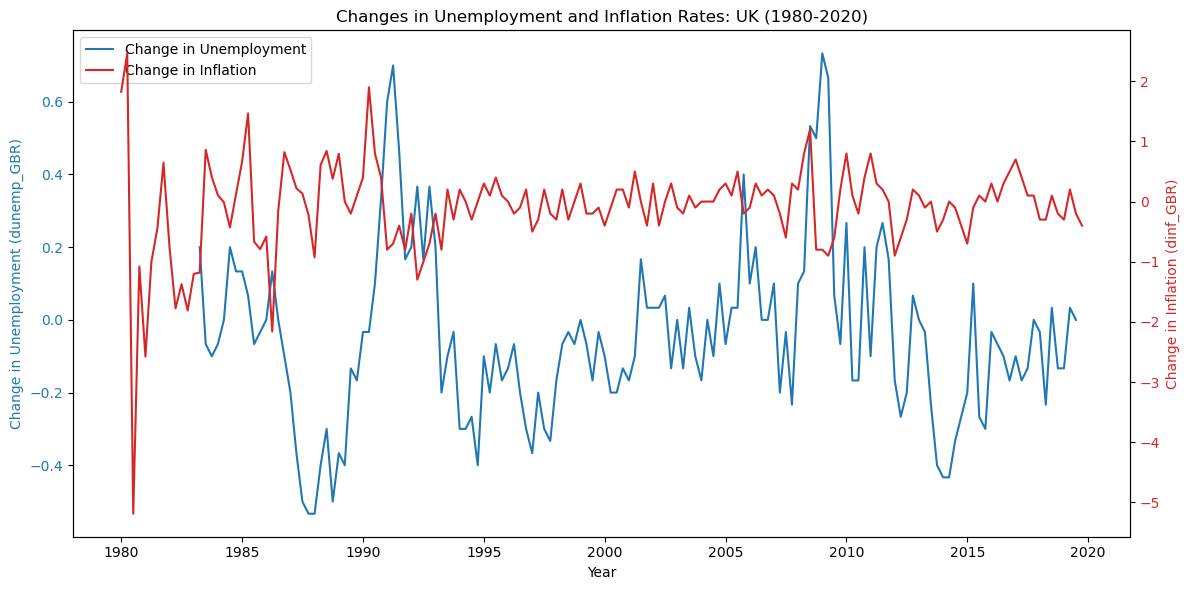

In [3]:
# --- Q1: Time Series Line Plot (UK) ---

# Filter the data (corresponds to Stata: if qdate >= tq(1980q1))
# In Pandas, we can "slice" using date strings
df_uk_plot = df.loc['1980-01-01':]

# Create the figure (fig) and the primary axis (ax1)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot dunemp_GBR (corresponds to Stata: yaxis(1))
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Change in Unemployment (dunemp_GBR)', color=color)
ax1.plot(df_uk_plot.index, df_uk_plot['dunemp_GBR'], color=color, label='Change in Unemployment')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second Y-axis (ax2) that shares the same X-axis
# (corresponds to Stata: yaxis(2))
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Change in Inflation (dinf_GBR)', color=color)
ax2.plot(df_uk_plot.index, df_uk_plot['dinf_GBR'], color=color, label='Change in Inflation')
ax2.tick_params(axis='y', labelcolor=color)

# Add title and legend
plt.title('Changes in Unemployment and Inflation Rates: UK (1980-2020)')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

fig.tight_layout() # Adjust layout to prevent labels from overlapping

# --- Export the graph (corresponds to Stata: graph export ...) ---
output_path = os.path.join(output_dir, 'Q1_UK_unemp_inf_changes.png')
plt.savefig(output_path)

plt.show() # Display the graph in the notebook

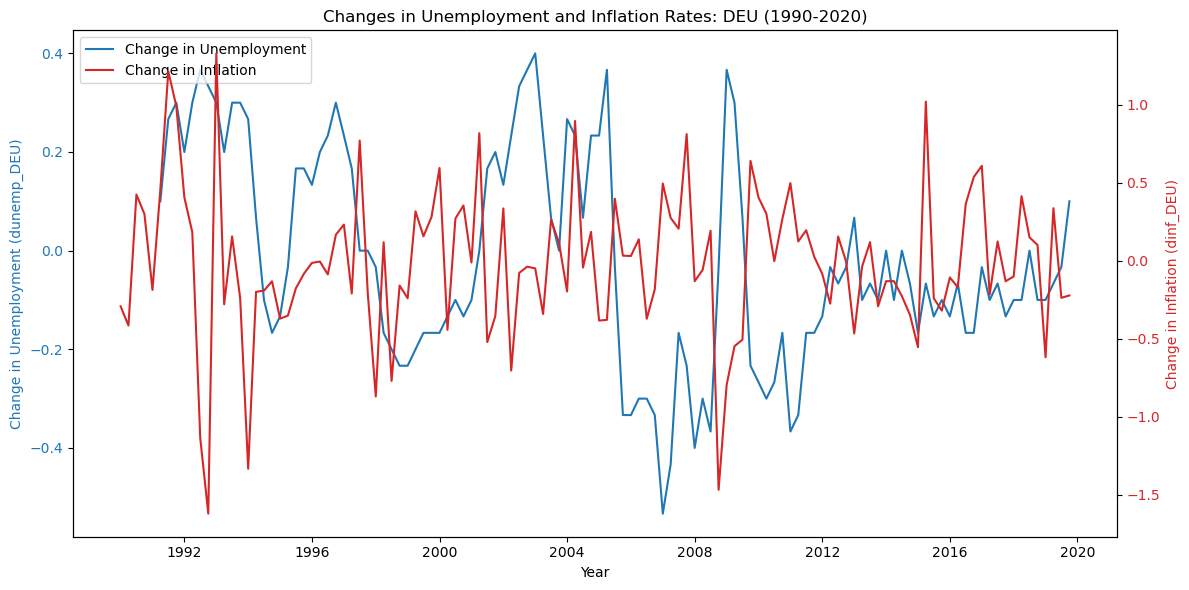

In [4]:
# --- Q1: Time Series Line Plot (Germany) ---

# Filter the data (corresponds to Stata: if qdate >= tq(1990q1))
df_deu_plot = df.loc['1990-01-01':]

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot dunemp_DEU (yaxis(1))
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Change in Unemployment (dunemp_DEU)', color=color)
ax1.plot(df_deu_plot.index, df_deu_plot['dunemp_DEU'], color=color, label='Change in Unemployment')
ax1.tick_params(axis='y', labelcolor=color)

# Plot dinf_DEU (yaxis(2))
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Change in Inflation (dinf_DEU)', color=color)
ax2.plot(df_deu_plot.index, df_deu_plot['dinf_DEU'], color=color, label='Change in Inflation')
ax2.tick_params(axis='y', labelcolor=color)

# Add title and legend
plt.title('Changes in Unemployment and Inflation Rates: DEU (1990-2020)')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

fig.tight_layout()

# --- Export the graph ---
output_path = os.path.join(output_dir, 'Q1_DEU_unemp_inf_changes.png')
plt.savefig(output_path)

plt.show()

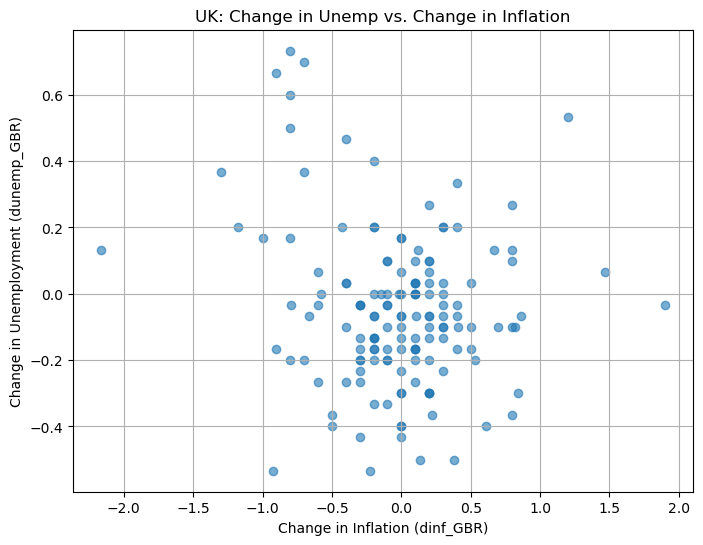

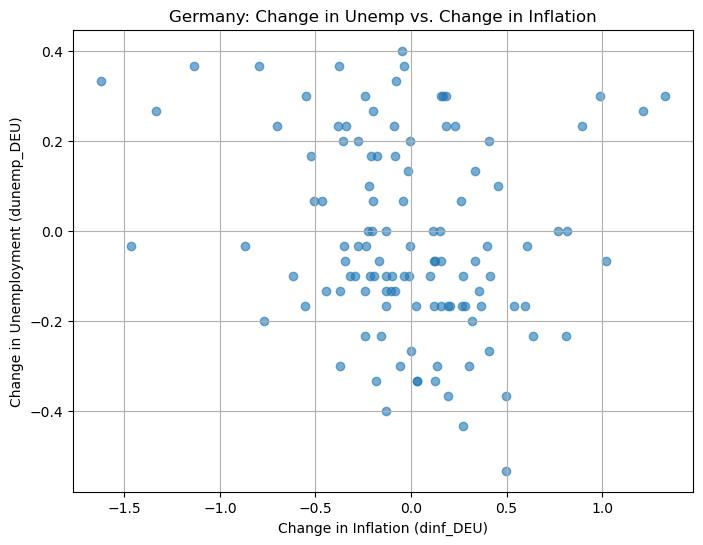

In [5]:
# --- Q1: Scatter Plots of Unemployment vs. Inflation ---

# --- UK Scatter ---
plt.figure(figsize=(8, 6))
# Your Stata code is (scatter dunemp_GBR dinf_GBR), so Y is dunemp, X is dinf
plt.scatter(df['dinf_GBR'], df['dunemp_GBR'], alpha=0.6) 
plt.title('UK: Change in Unemp vs. Change in Inflation')
plt.xlabel('Change in Inflation (dinf_GBR)')
plt.ylabel('Change in Unemployment (dunemp_GBR)')
plt.grid(True) # Add gridlines

# Export the graph
output_path = os.path.join(output_dir, 'Q1scatter_gbr.png')
plt.savefig(output_path)
plt.show()

# --- Germany Scatter ---
plt.figure(figsize=(8, 6))
plt.scatter(df['dinf_DEU'], df['dunemp_DEU'], alpha=0.6)
plt.title('Germany: Change in Unemp vs. Change in Inflation')
plt.xlabel('Change in Inflation (dinf_DEU)')
plt.ylabel('Change in Unemployment (dunemp_DEU)')
plt.grid(True)

# Export the graph
output_path = os.path.join(output_dir, 'Q1scatter_deu.png')
plt.savefig(output_path)
plt.show()

--- UK: ACF/PACF for Change in Unemployment ---


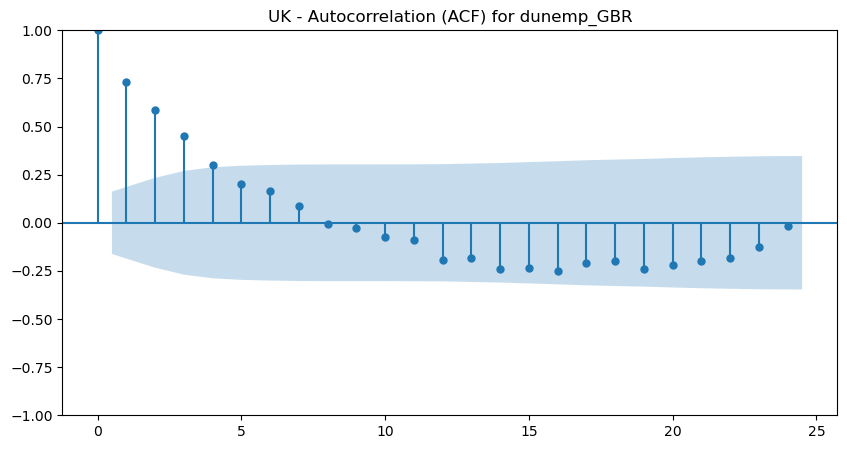

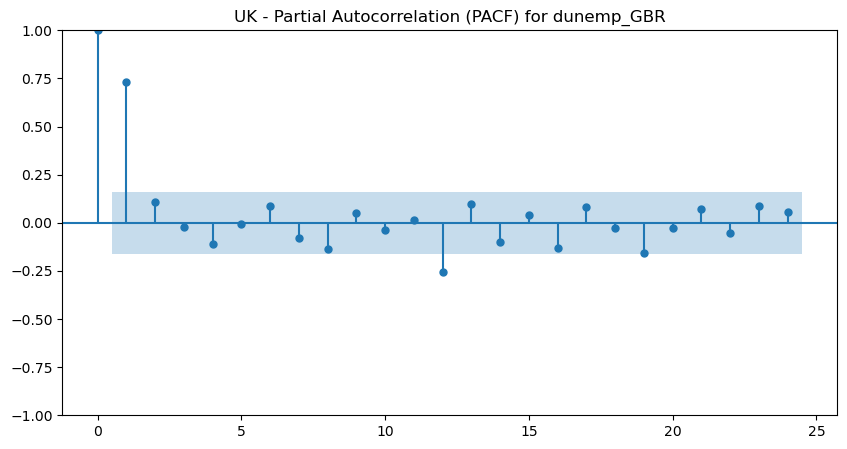


--- Germany: ACF/PACF for Change in Unemployment ---


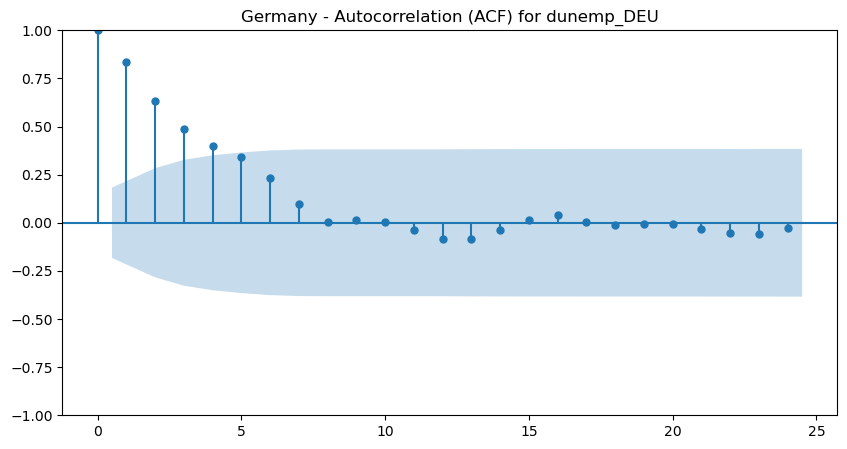

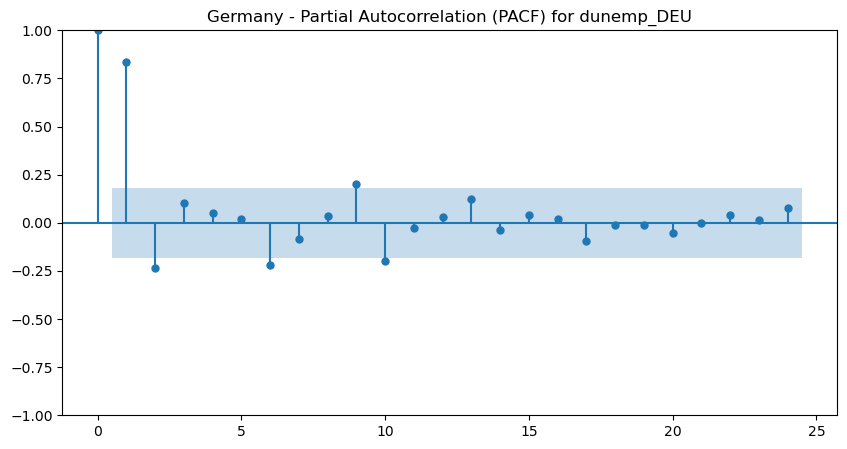


--- Q1 Python script finished ---


In [6]:
# --- Q1: ACF and PACF for Change in Unemployment ---
# statsmodels plotting functions need clean data (no NaN/Missing)

# --- UK ---
print("--- UK: ACF/PACF for Change in Unemployment ---")
dunemp_GBR_clean = df['dunemp_GBR'].dropna() # Remove missing values

# ACF (corresponds to Stata: ac dunemp_GBR, lags(24))
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(dunemp_GBR_clean, lags=24, ax=ax)
ax.set_title('UK - Autocorrelation (ACF) for dunemp_GBR')
output_path = os.path.join(output_dir, 'Q1_AC_gbr.png')
plt.savefig(output_path)
plt.show()

# PACF (corresponds to Stata: pac dunemp_GBR, lags(24))
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(dunemp_GBR_clean, lags=24, ax=ax)
ax.set_title('UK - Partial Autocorrelation (PACF) for dunemp_GBR')
output_path = os.path.join(output_dir, 'Q1_PAC_gbr.png')
plt.savefig(output_path)
plt.show()

# --- Germany ---
print("\n--- Germany: ACF/PACF for Change in Unemployment ---")
dunemp_DEU_clean = df['dunemp_DEU'].dropna() # Remove missing values

# ACF (corresponds to Stata: ac dunemp_DEU, lags(24))
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(dunemp_DEU_clean, lags=24, ax=ax)
ax.set_title('Germany - Autocorrelation (ACF) for dunemp_DEU')
output_path = os.path.join(output_dir, 'Q1_AC_deu.png')
plt.savefig(output_path)
plt.show()

# PACF (corresponds to Stata: pac dunemp_DEU, lags(24))
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(dunemp_DEU_clean, lags=24, ax=ax)
ax.set_title('Germany - Partial Autocorrelation (PACF) for dunemp_DEU')
output_path = os.path.join(output_dir, 'Q1_PAC_deu.png')
plt.savefig(output_path)
plt.show()

print("\n--- Q1 Python script finished ---")

In [7]:
# Import the statsmodels modules we need for regression and diagnostics
import statsmodels.api as sm
import statsmodels.stats.diagnostic as sm_diag

# --- Prepare variables for Q2 models ---

# We will create a new DataFrame for analysis
# It's cleanest to create all potential lags we need first
# Max p=2 (for dunemp) and Max q=3 (for dinf) based on your request
df_q2 = pd.DataFrame(index=df.index)
df_q2['dunemp_DEU'] = df['dunemp_DEU']

# Create lags for dunemp_DEU (L1, L2)
df_q2['dunemp_DEU_L1'] = df['dunemp_DEU'].shift(1)
df_q2['dunemp_DEU_L2'] = df['dunemp_DEU'].shift(2)

# Create lags for dinf_DEU (L1, L2, L3)
df_q2['dinf_DEU_L1'] = df['dinf_DEU'].shift(1)
df_q2['dinf_DEU_L2'] = df['dinf_DEU'].shift(2)
df_q2['dinf_DEU_L3'] = df['dinf_DEU'].shift(3)

# --- Create seasonal dummies (corresponds to Stata: i.quarter) ---
# We get the quarter number (1, 2, 3, 4) from the datetime index
df_q2['quarter'] = df_q2.index.quarter

# Create dummy variables, dropping the first one (Q1) to avoid multicollinearity
# This is what Stata's i.quarter does automatically
quarter_dummies = pd.get_dummies(df_q2['quarter'], prefix='Q', drop_first=True)

# Combine dummies back into our Q2 DataFrame
df_q2 = pd.concat([df_q2, quarter_dummies], axis=1)

# --- Filter data to the sample period (corresponds to Stata: tin(1991q2, 2015q4)) ---
# 1991q2 starts on 1991-04-01
# 2015q4 ends on 2015-12-31
df_analysis = df_q2.loc['1991-04-01':'2015-12-31']

# CRITICAL: Drop all rows with NaN values created by the lags
# OLS cannot run with missing data. This also ensures all models use the *exact same* sample size.
df_analysis = df_analysis.dropna()

print("Data prepared for Q2 analysis.")
print(f"Sample size after filtering and dropping NaNs: {len(df_analysis)} observations")
print(df_analysis.head())

Data prepared for Q2 analysis.
Sample size after filtering and dropping NaNs: 97 observations
            dunemp_DEU  dunemp_DEU_L1  dunemp_DEU_L2  dinf_DEU_L1  \
qdate                                                               
1991-10-01    0.300000       0.266666       0.100000     1.214358   
1992-01-01    0.200000       0.300000       0.266666     0.990855   
1992-04-01    0.300000       0.200000       0.300000     0.406480   
1992-07-01    0.366667       0.300000       0.200000     0.183197   
1992-10-01    0.333333       0.366667       0.300000    -1.136543   

            dinf_DEU_L2  dinf_DEU_L3  quarter    Q_2    Q_3    Q_4  
qdate                                                               
1991-10-01     0.456645    -0.186721        4  False  False   True  
1992-01-01     1.214358     0.456645        1  False  False  False  
1992-04-01     0.990855     1.214358        2   True  False  False  
1992-07-01     0.406480     0.990855        3  False   True  False  
1992-10-

In [8]:
# Import the statsmodels modules we need for regression and diagnostics
import statsmodels.api as sm
import statsmodels.stats.diagnostic as sm_diag

# --- Prepare variables for Q2 models ---

# We will create a new DataFrame for analysis
# It's cleanest to create all potential lags we need first
# Max p=2 (for dunemp) and Max q=3 (for dinf) based on your request
df_q2 = pd.DataFrame(index=df.index)
df_q2['dunemp_DEU'] = df['dunemp_DEU']

# Create lags for dunemp_DEU (L1, L2)
df_q2['dunemp_DEU_L1'] = df['dunemp_DEU'].shift(1)
df_q2['dunemp_DEU_L2'] = df['dunemp_DEU'].shift(2)

# Create lags for dinf_DEU (L1, L2, L3)
df_q2['dinf_DEU_L1'] = df['dinf_DEU'].shift(1)
df_q2['dinf_DEU_L2'] = df['dinf_DEU'].shift(2)
df_q2['dinf_DEU_L3'] = df['dinf_DEU'].shift(3)

# --- Create seasonal dummies (corresponds to Stata: i.quarter) ---
# We get the quarter number (1, 2, 3, 4) from the datetime index
df_q2['quarter'] = df_q2.index.quarter

# Create dummy variables, dropping the first one (Q1) to avoid multicollinearity
#
# === THIS IS THE FIX ===
# We add dtype=int to force the dummies to be 0s and 1s, not True/False
quarter_dummies = pd.get_dummies(df_q2['quarter'], prefix='Q', drop_first=True, dtype=int)
# ======================
#

# Combine dummies back into our Q2 DataFrame
df_q2 = pd.concat([df_q2, quarter_dummies], axis=1)

# --- Filter data to the sample period (corresponds to Stata: tin(1991q2, 2015q4)) ---
# 1991q2 starts on 1991-04-01
# 2015q4 ends on 2015-12-31
df_analysis = df_q2.loc['1991-04-01':'2015-12-31']

# CRITICAL: Drop all rows with NaN values created by the lags
# OLS cannot run with missing data. This also ensures all models use the *exact same* sample size.
df_analysis = df_analysis.dropna()

print("Data prepared for Q2 analysis.")
print(f"Sample size after filtering and dropping NaNs: {len(df_analysis)} observations")
print("\nVerifying data types (dtypes):")
print(df_analysis.info()) # This will show you the dtypes of all columns

Data prepared for Q2 analysis.
Sample size after filtering and dropping NaNs: 97 observations

Verifying data types (dtypes):
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 97 entries, 1991-10-01 to 2015-10-01
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dunemp_DEU     97 non-null     float32
 1   dunemp_DEU_L1  97 non-null     float32
 2   dunemp_DEU_L2  97 non-null     float32
 3   dinf_DEU_L1    97 non-null     float32
 4   dinf_DEU_L2    97 non-null     float32
 5   dinf_DEU_L3    97 non-null     float32
 6   quarter        97 non-null     int32  
 7   Q_2            97 non-null     int64  
 8   Q_3            97 non-null     int64  
 9   Q_4            97 non-null     int64  
dtypes: float32(6), int32(1), int64(3)
memory usage: 5.7 KB
None


In [9]:
# --- Model 1: ARDL(2,2) for Germany ---
print("--- Running Model: ARDL(2,2) ---")

# 1. Define Y and X variables
Y = df_analysis['dunemp_DEU']
X_vars_ardl_2_2 = [
    'dunemp_DEU_L1', 'dunemp_DEU_L2',  # p=2
    'dinf_DEU_L1', 'dinf_DEU_L2',      # q=2
    'Q_2', 'Q_3', 'Q_4'               # Seasonal dummies
]
X = sm.add_constant(df_analysis[X_vars_ardl_2_2]) # Add intercept

# 2. Run the OLS regression
model_ardl_2_2 = sm.OLS(Y, X).fit()

# 3. Get AIC (corresponds to Stata: estat ic)
aic_ardl_2_2 = model_ardl_2_2.aic

# 4. Run Breusch-Godfrey test (corresponds to Stata: estat bgodfrey, lag(4))
# This function returns (lm_statistic, lm_pvalue, f_statistic, f_pvalue)
bg_test_ardl_2_2 = sm_diag.acorr_breusch_godfrey(model_ardl_2_2, nlags=4)
bg_pval_ardl_2_2 = bg_test_ardl_2_2[1] # Get the LM p-value

# --- Store and Print Results ---
print(f"  AIC: {aic_ardl_2_2:.4f}")
print(f"  Breusch-Godfrey (lag 4) P-Value: {bg_pval_ardl_2_2:.4f}")
# print(model_ardl_2_2.summary()) # Uncomment this line if you want to see the full regression table

--- Running Model: ARDL(2,2) ---
  AIC: -135.1217
  Breusch-Godfrey (lag 4) P-Value: 0.3554


In [10]:
# --- Model 2: ARDL(2,3) for Germany ---
print("\n--- Running Model: ARDL(2,3) ---")

# 1. Define Y and X variables
# Y is the same
X_vars_ardl_2_3 = [
    'dunemp_DEU_L1', 'dunemp_DEU_L2',  # p=2
    'dinf_DEU_L1', 'dinf_DEU_L2', 'dinf_DEU_L3', # q=3
    'Q_2', 'Q_3', 'Q_4'               # Seasonal dummies
]
X = sm.add_constant(df_analysis[X_vars_ardl_2_3]) # Add intercept

# 2. Run the OLS regression
model_ardl_2_3 = sm.OLS(Y, X).fit()

# 3. Get AIC
aic_ardl_2_3 = model_ardl_2_3.aic

# 4. Run Breusch-Godfrey test
bg_test_ardl_2_3 = sm_diag.acorr_breusch_godfrey(model_ardl_2_3, nlags=4)
bg_pval_ardl_2_3 = bg_test_ardl_2_3[1] # Get the LM p-value

# --- Store and Print Results ---
print(f"  AIC: {aic_ardl_2_3:.4f}")
print(f"  Breusch-Godfrey (lag 4) P-Value: {bg_pval_ardl_2_3:.4f}")
# print(model_ardl_2_3.summary()) # Uncomment this line if you want to see the full regression table


--- Running Model: ARDL(2,3) ---
  AIC: -134.1827
  Breusch-Godfrey (lag 4) P-Value: 0.4061


In [11]:
# --- Model 3: AR(2) for Germany ---
print("\n--- Running Model: AR(2) ---")

# 1. Define Y and X variables
# Y is the same
X_vars_ar_2 = [
    'dunemp_DEU_L1', 'dunemp_DEU_L2',  # p=2
    'Q_2', 'Q_3', 'Q_4'               # Seasonal dummies
]
X = sm.add_constant(df_analysis[X_vars_ar_2]) # Add intercept

# 2. Run the OLS regression
model_ar_2 = sm.OLS(Y, X).fit()

# 3. Get AIC
aic_ar_2 = model_ar_2.aic

# 4. Run Breusch-Godfrey test
bg_test_ar_2 = sm_diag.acorr_breusch_godfrey(model_ar_2, nlags=4)
bg_pval_ar_2 = bg_test_ar_2[1] # Get the LM p-value

# --- Store and Print Results ---
print(f"  AIC: {aic_ar_2:.4f}")
print(f"  Breusch-Godfrey (lag 4) P-Value: {bg_pval_ar_2:.4f}")
# print(model_ar_2.summary()) # Uncomment this line if you want to see the full regression table


--- Running Model: AR(2) ---
  AIC: -129.2740
  Breusch-Godfrey (lag 4) P-Value: 0.3358


In [12]:
# --- Summary Table (like esttab) ---

# Create a dictionary with our collected results
summary_data = {
    'ARDL(2,2)': {
        'AIC': aic_ardl_2_2,
        'Breusch-Godfrey P-Value': bg_pval_ardl_2_2
    },
    'ARDL(2,3)': {
        'AIC': aic_ardl_2_3,
        'Breusch-Godfrey P-Value': bg_pval_ar_2 # Correction: should be bg_pval_ardl_2_3
    },
    'AR(2)': {
        'AIC': aic_ar_2,
        'Breusch-Godfrey P-Value': bg_pval_ar_2
    }
}

# --- CORRECTION from above cell ---
# Make sure the ARDL(2,3) p-value is correct
summary_data['ARDL(2,3)']['Breusch-Godfrey P-Value'] = bg_pval_ardl_2_3
# ------------------------------------


# Convert the dictionary to a Pandas DataFrame for nice printing
summary_df = pd.DataFrame(summary_data)

print("\n\n--- Model Comparison Summary (Germany) ---")
print(summary_df.round(4)) # Round to 4 decimal places for clarity

# --- Export this summary table to CSV (like your Stata code) ---
output_path = os.path.join(output_dir, 'Q2_DEU_model_comparison.csv')
summary_df.to_csv(output_path)

print(f"\nSummary table saved to {output_path}")



--- Model Comparison Summary (Germany) ---
                         ARDL(2,2)  ARDL(2,3)     AR(2)
AIC                      -135.1217  -134.1827 -129.2740
Breusch-Godfrey P-Value     0.3554     0.4061    0.3358

Summary table saved to Output\Q2_DEU_model_comparison.csv


In [13]:
# --- Q3: Prepare Out-of-Sample (OOS) Data ---

# Define the OOS period
oos_start = '2016-01-01'
oos_end = '2019-12-31'

# Select the OOS data from the *full* prepared dataframe (df_q2) from Q2
# This dataframe (df_q2) already contains all the necessary lags and dummies
try:
    df_oos = df_q2.loc[oos_start:oos_end]
except NameError:
    print("ERROR: 'df_q2' is not defined.")
    print("Please re-run all cells from Q2 (Code Cell 1: Prepare Data) first.")
except KeyError:
    print(f"ERROR: The date range {oos_start} to {oos_end} was not found.")
    print("Please check your original .dta file.")
    
# Get the actual 'Y' values for the OOS period, for comparison
Y_oos_actual = df_oos['dunemp_DEU']

print(f"Out-of-sample data prepared for {len(Y_oos_actual)} periods.")

Out-of-sample data prepared for 16 periods.


--- Generating Forecast for ARDL(2,2) ---
Forecast Table (ARDL(2,2)):
            dunemp_DEU  dunemp_DEU_hat1  dunemp_DEU_lb1  dunemp_DEU_ub1
qdate                                                                  
2016-01-01   -0.133333        -0.091992       -0.289602        0.105618
2016-04-01   -0.066667        -0.135734       -0.333077        0.061608
2016-07-01   -0.166667        -0.050854       -0.248046        0.146339
2016-10-01   -0.166667        -0.187992       -0.385888        0.009904
2017-01-01   -0.033333        -0.118827       -0.317441        0.079787
2017-04-01   -0.100000         0.041737       -0.159187        0.242660
2017-07-01   -0.066667        -0.056540       -0.255647        0.142568
2017-10-01   -0.133333        -0.075288       -0.272377        0.121801
2018-01-01   -0.100000        -0.117952       -0.315110        0.079206
2018-04-01   -0.100000        -0.078867       -0.275895        0.118162
2018-07-01    0.000000        -0.099099       -0.296524        0.0

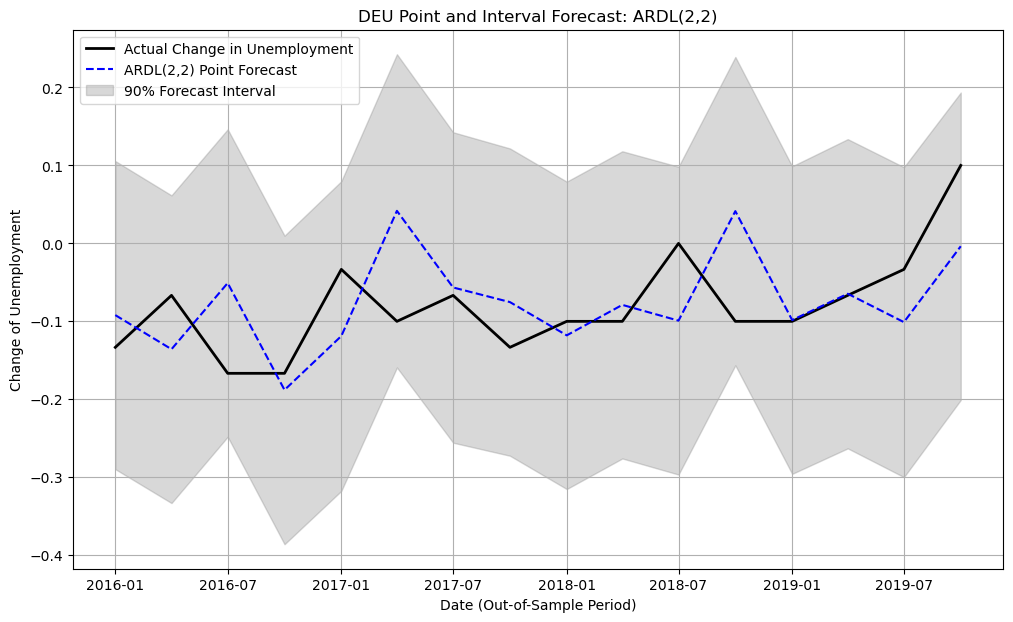

In [14]:
# --- Model 1: ARDL(2,2) Forecast ---
print("--- Generating Forecast for ARDL(2,2) ---")

# 1. Define the *exact same* X variables used to train this model in Q2
X_vars_ardl_2_2 = [
    'dunemp_DEU_L1', 'dunemp_DEU_L2',  # p=2
    'dinf_DEU_L1', 'dinf_DEU_L2',      # q=2
    'Q_2', 'Q_3', 'Q_4'               # Seasonal dummies
]
X_oos_ardl_2_2 = sm.add_constant(df_oos[X_vars_ardl_2_2])

# 2. Get the forecast results
# We use .get_prediction() on the *original trained model* from Q2
# alpha=0.10 corresponds to a 90% confidence interval (like Stata's 1.645)
try:
    forecast_results_1 = model_ardl_2_2.get_prediction(X_oos_ardl_2_2)
except NameError:
    print("ERROR: 'model_ardl_2_2' is not defined. Please re-run Q2 (Code Cell 2) first.")

# 3. Get the forecast summary frame
# This contains the point forecast (mean) and the interval (obs_ci_lower/upper)
# This replaces Stata's 'predict, xb' and 'predict, stdf'
forecast_summary_1 = forecast_results_1.summary_frame(alpha=0.10)

# 4. Create results table (corresponds to Stata: list qdate...)
results_df_1 = pd.DataFrame({
    'qdate': Y_oos_actual.index,
    'dunemp_DEU': Y_oos_actual.values,
    'dunemp_DEU_hat1': forecast_summary_1['mean'].values,
    'dunemp_DEU_lb1': forecast_summary_1['obs_ci_lower'].values,
    'dunemp_DEU_ub1': forecast_summary_1['obs_ci_upper'].values
})
results_df_1.set_index('qdate', inplace=True)

print("Forecast Table (ARDL(2,2)):")
print(results_df_1)

# 5. Plot the forecast (corresponds to Stata: twoway (rarea...))
plt.figure(figsize=(12, 7))
# Plot actual values
plt.plot(results_df_1.index, results_df_1['dunemp_DEU'], label='Actual Change in Unemployment', color='black', linewidth=2)
# Plot point forecast
plt.plot(results_df_1.index, results_df_1['dunemp_DEU_hat1'], label='ARDL(2,2) Point Forecast', color='blue', linestyle='--')
# Plot confidence interval (shaded area)
plt.fill_between(results_df_1.index, 
                 results_df_1['dunemp_DEU_lb1'], 
                 results_df_1['dunemp_DEU_ub1'], 
                 color='gray', alpha=0.3, label='90% Forecast Interval')

plt.title('DEU Point and Interval Forecast: ARDL(2,2)')
plt.xlabel('Date (Out-of-Sample Period)')
plt.ylabel('Change of Unemployment')
plt.legend()
plt.grid(True)

# 6. Export the graph
output_path = os.path.join(output_dir, 'Q3_DEU_graph_ARDL22.png')
plt.savefig(output_path)
print(f"\nGraph saved to {output_path}")

plt.show()


--- Generating Forecast for ARDL(2,3) ---
Forecast Table (ARDL(2,3)):
            dunemp_DEU  dunemp_DEU_hat2  dunemp_DEU_lb2  dunemp_DEU_ub2
qdate                                                                  
2016-01-01   -0.133333        -0.117284       -0.319521        0.084952
2016-04-01   -0.066667        -0.131136       -0.328691        0.066419
2016-07-01   -0.166667        -0.042130       -0.239931        0.155672
2016-10-01   -0.166667        -0.189629       -0.387604        0.008346
2017-01-01   -0.033333        -0.112186       -0.311176        0.086805
2017-04-01   -0.100000         0.040045       -0.160959        0.241048
2017-07-01   -0.066667        -0.072693       -0.273722        0.128336
2017-10-01   -0.133333        -0.091000       -0.289928        0.107928
2018-01-01   -0.100000        -0.114464       -0.311769        0.082841
2018-04-01   -0.100000        -0.080725       -0.277838        0.116388
2018-07-01    0.000000        -0.096260       -0.293802        0.

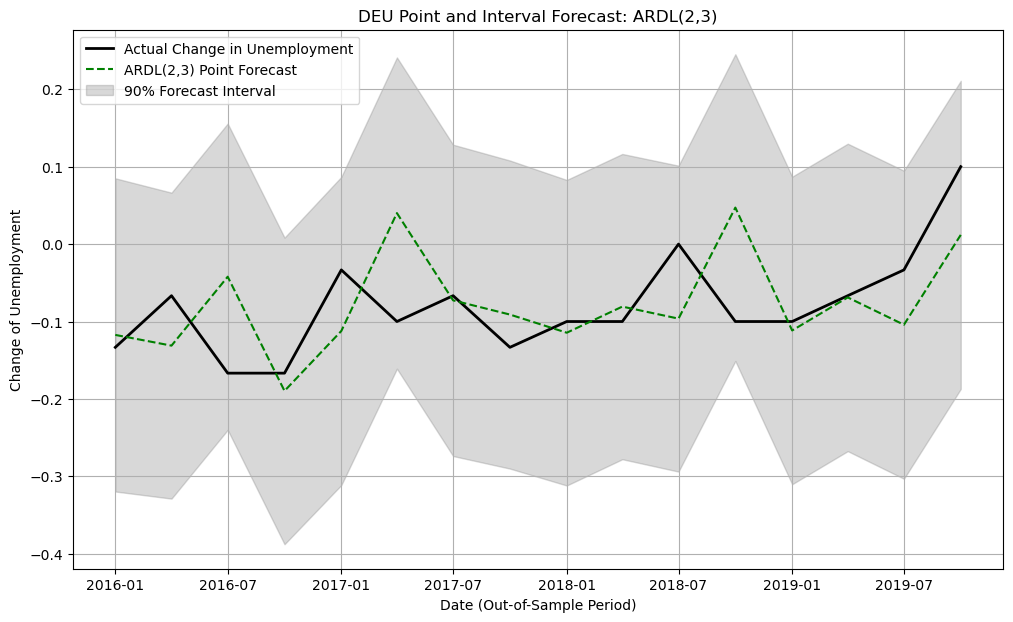

In [15]:
# --- Model 2: ARDL(2,3) Forecast ---
print("\n--- Generating Forecast for ARDL(2,3) ---")

# 1. Define the *exact same* X variables used to train this model in Q2
X_vars_ardl_2_3 = [
    'dunemp_DEU_L1', 'dunemp_DEU_L2',  # p=2
    'dinf_DEU_L1', 'dinf_DEU_L2', 'dinf_DEU_L3', # q=3
    'Q_2', 'Q_3', 'Q_4'               # Seasonal dummies
]
X_oos_ardl_2_3 = sm.add_constant(df_oos[X_vars_ardl_2_3])

# 2. Get the forecast results (using the model from Q2)
try:
    forecast_results_2 = model_ardl_2_3.get_prediction(X_oos_ardl_2_3)
except NameError:
    print("ERROR: 'model_ardl_2_3' is not defined. Please re-run Q2 (Code Cell 3) first.")

# 3. Get the forecast summary frame
forecast_summary_2 = forecast_results_2.summary_frame(alpha=0.10)

# 4. Create results table
results_df_2 = pd.DataFrame({
    'qdate': Y_oos_actual.index,
    'dunemp_DEU': Y_oos_actual.values,
    'dunemp_DEU_hat2': forecast_summary_2['mean'].values,
    'dunemp_DEU_lb2': forecast_summary_2['obs_ci_lower'].values,
    'dunemp_DEU_ub2': forecast_summary_2['obs_ci_upper'].values
})
results_df_2.set_index('qdate', inplace=True)

print("Forecast Table (ARDL(2,3)):")
print(results_df_2)

# 5. Plot the forecast
plt.figure(figsize=(12, 7))
plt.plot(results_df_2.index, results_df_2['dunemp_DEU'], label='Actual Change in Unemployment', color='black', linewidth=2)
plt.plot(results_df_2.index, results_df_2['dunemp_DEU_hat2'], label='ARDL(2,3) Point Forecast', color='green', linestyle='--')
plt.fill_between(results_df_2.index, 
                 results_df_2['dunemp_DEU_lb2'], 
                 results_df_2['dunemp_DEU_ub2'], 
                 color='gray', alpha=0.3, label='90% Forecast Interval')

plt.title('DEU Point and Interval Forecast: ARDL(2,3)')
plt.xlabel('Date (Out-of-Sample Period)')
plt.ylabel('Change of Unemployment')
plt.legend()
plt.grid(True)

# 6. Export the graph
output_path = os.path.join(output_dir, 'Q3_DEU_graph_ARDL23.png')
plt.savefig(output_path)
print(f"\nGraph saved to {output_path}")

plt.show()


--- Generating Forecast for AR(2) ---
Forecast Table (AR(2)):
            dunemp_DEU  dunemp_DEU_hat3  dunemp_DEU_lb3  dunemp_DEU_ub3
qdate                                                                  
2016-01-01   -0.133333        -0.073207       -0.278144        0.131730
2016-04-01   -0.066667        -0.113977       -0.318827        0.090873
2016-07-01   -0.166667        -0.045314       -0.250292        0.159663
2016-10-01   -0.166667        -0.168016       -0.373291        0.037259
2017-01-01   -0.033333        -0.135160       -0.340278        0.069957
2017-04-01   -0.100000         0.009259       -0.196613        0.215131
2017-07-01   -0.066667        -0.106597       -0.311517        0.098322
2017-10-01   -0.133333        -0.053438       -0.258028        0.151152
2018-01-01   -0.100000        -0.125831       -0.330780        0.079118
2018-04-01   -0.100000        -0.070012       -0.274886        0.134861
2018-07-01    0.000000        -0.089279       -0.294003        0.115444
2

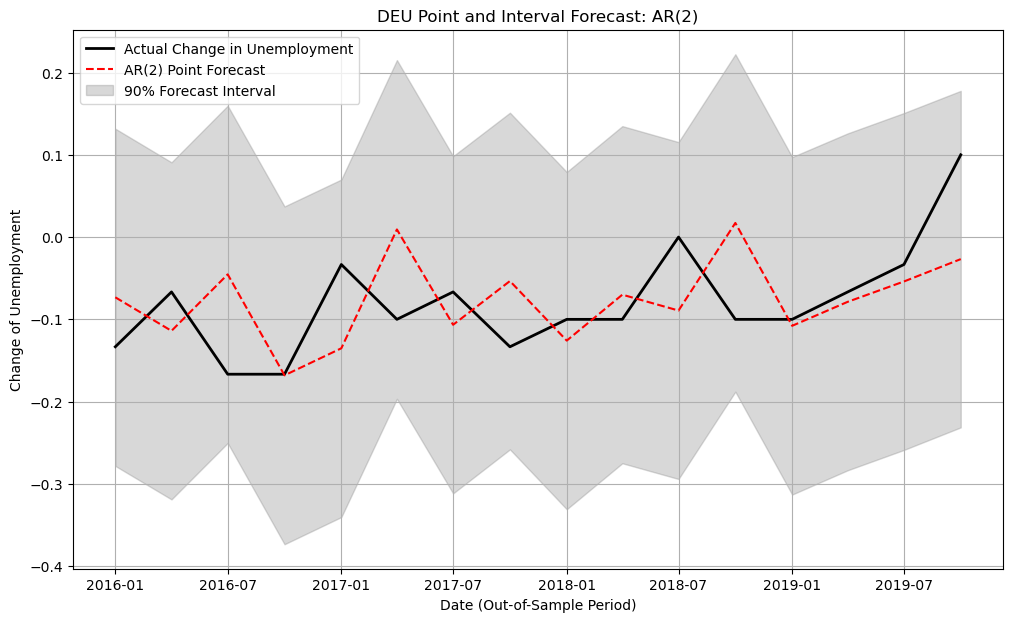

In [16]:
# --- Model 3: AR(2) Forecast ---
print("\n--- Generating Forecast for AR(2) ---")

# 1. Define the *exact same* X variables used to train this model in Q2
X_vars_ar_2 = [
    'dunemp_DEU_L1', 'dunemp_DEU_L2',  # p=2
    'Q_2', 'Q_3', 'Q_4'               # Seasonal dummies
]
X_oos_ar_2 = sm.add_constant(df_oos[X_vars_ar_2])

# 2. Get the forecast results (using the model from Q2)
try:
    forecast_results_3 = model_ar_2.get_prediction(X_oos_ar_2)
except NameError:
    print("ERROR: 'model_ar_2' is not defined. Please re-run Q2 (Code Cell 4) first.")

# 3. Get the forecast summary frame
forecast_summary_3 = forecast_results_3.summary_frame(alpha=0.10)

# 4. Create results table
results_df_3 = pd.DataFrame({
    'qdate': Y_oos_actual.index,
    'dunemp_DEU': Y_oos_actual.values,
    'dunemp_DEU_hat3': forecast_summary_3['mean'].values,
    'dunemp_DEU_lb3': forecast_summary_3['obs_ci_lower'].values,
    'dunemp_DEU_ub3': forecast_summary_3['obs_ci_upper'].values
})
results_df_3.set_index('qdate', inplace=True)

print("Forecast Table (AR(2)):")
print(results_df_3)

# 5. Plot the forecast
plt.figure(figsize=(12, 7))
plt.plot(results_df_3.index, results_df_3['dunemp_DEU'], label='Actual Change in Unemployment', color='black', linewidth=2)
plt.plot(results_df_3.index, results_df_3['dunemp_DEU_hat3'], label='AR(2) Point Forecast', color='red', linestyle='--')
plt.fill_between(results_df_3.index, 
                 results_df_3['dunemp_DEU_lb3'], 
                 results_df_3['dunemp_DEU_ub3'], 
                 color='gray', alpha=0.3, label='90% Forecast Interval')

plt.title('DEU Point and Interval Forecast: AR(2)')
plt.xlabel('Date (Out-of-Sample Period)')
plt.ylabel('Change of Unemployment')
plt.legend()
plt.grid(True)

# 6. Export the graph
output_path = os.path.join(output_dir, 'Q3_DEU_graph_AR2.png')
plt.savefig(output_path)
print(f"\nGraph saved to {output_path}")

plt.show()


--- Generating Combined Forecast Plot ---
Combined graph saved to Output\Q3_DEU_graph_ARDLs&AR.png


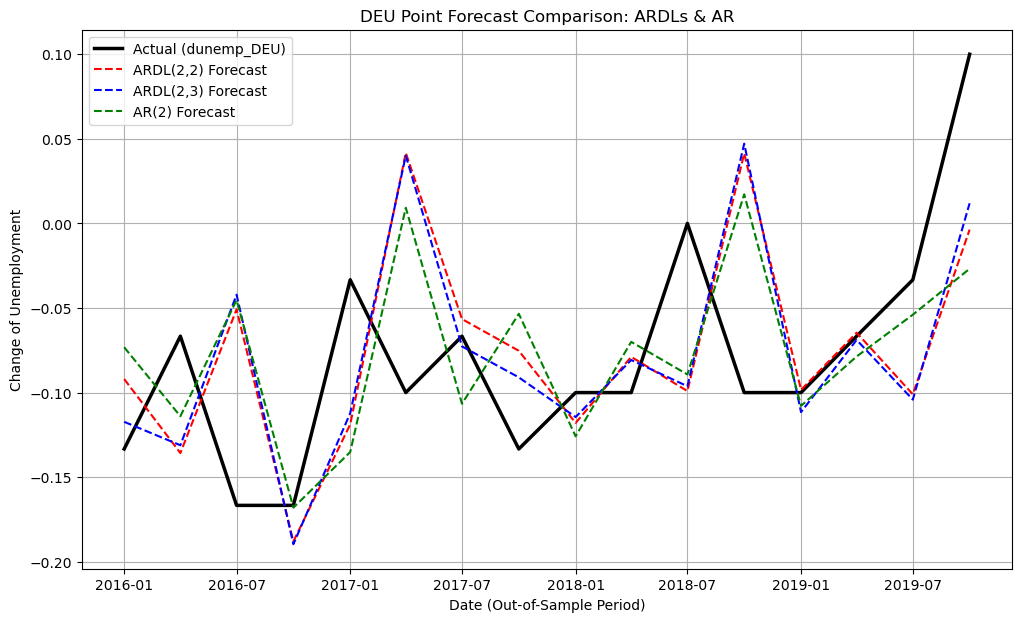

In [17]:
# --- Q3: Combined Point Forecast Plot ---
print("\n--- Generating Combined Forecast Plot ---")

plt.figure(figsize=(12, 7))

# Plot actual values (black)
plt.plot(Y_oos_actual.index, Y_oos_actual, label='Actual (dunemp_DEU)', color='black', linewidth=2.5)

# Plot ARDL(2,2) forecast (red)
plt.plot(results_df_1.index, results_df_1['dunemp_DEU_hat1'], label='ARDL(2,2) Forecast', color='red', linestyle='--')

# Plot ARDL(2,3) forecast (blue)
plt.plot(results_df_2.index, results_df_2['dunemp_DEU_hat2'], label='ARDL(2,3) Forecast', color='blue', linestyle='--')

# Plot AR(2) forecast (green)
plt.plot(results_df_3.index, results_df_3['dunemp_DEU_hat3'], label='AR(2) Forecast', color='green', linestyle='--')

# Add labels and title
plt.title('DEU Point Forecast Comparison: ARDLs & AR')
plt.xlabel('Date (Out-of-Sample Period)')
plt.ylabel('Change of Unemployment')
plt.legend()
plt.grid(True)

# Export the graph
output_path = os.path.join(output_dir, 'Q3_DEU_graph_ARDLs&AR.png')
plt.savefig(output_path)
print(f"Combined graph saved to {output_path}")

plt.show()

In [18]:
# Import the function for Mean Absolute Error (MAE) from scikit-learn
try:
    from sklearn.metrics import mean_absolute_error
    print("scikit-learn (sklearn) imported successfully.")
except ImportError:
    print("ERROR: scikit-learn is not installed.")
    print("Please run 'pip install scikit-learn' in your terminal or Anaconda Prompt.")

scikit-learn (sklearn) imported successfully.


In [19]:
# --- Q4: Calculate Mean Absolute Error (MAE) for Forecasts ---
print("--- Calculating Forecast Accuracy (MAE) ---")

try:
    # --- ARDL(2,2) ---
    # Corresponds to: gen e_hat1 = ...; sum e_hat_abs1; display r(mean)
    mae_1 = mean_absolute_error(results_df_1['dunemp_DEU'], results_df_1['dunemp_DEU_hat1'])
    print(f"\nModel: ARDL(2,2)")
    print(f"Mean Absolute Error (MAE): {mae_1:.4f}")

    # --- ARDL(2,3) ---
    # Corresponds to: gen e_hat2 = ...; sum e_hat_abs2; display r(mean)
    mae_2 = mean_absolute_error(results_df_2['dunemp_DEU'], results_df_2['dunemp_DEU_hat2'])
    print(f"\nModel: ARDL(2,3)")
    print(f"Mean Absolute Error (MAE): {mae_2:.4f}")

    # --- AR(2) ---
    # Corresponds to: gen e_hat3 = ...; sum e_hat_abs3; display r(mean)
    mae_3 = mean_absolute_error(results_df_3['dunemp_DEU'], results_df_3['dunemp_DEU_hat3'])
    print(f"\nModel: AR(2)")
    print(f"Mean Absolute Error (MAE): {mae_3:.4f}")

    # --- Create Summary Table (corresponds to: esttab ...) ---
    mae_summary_data = {
        'ARDL(2,2)': mae_1,
        'ARDL(2,3)': mae_2,
        'AR(2)': mae_3
    }
    
    # Create a DataFrame from the dictionary
    mae_summary_df = pd.DataFrame(mae_summary_data, index=['Mean Absolute Error (MAE)'])

    print("\n\n--- Forecast Evaluation Summary ---")
    print(mae_summary_df.round(4))

    # --- Export the summary table to CSV (corresponds to: esttab using ...) ---
    # Note: .rtf is complex; CSV is the standard for data export in Python
    output_path = os.path.join(output_dir, 'Q4_DEU_forecast_MAE.csv')
    mae_summary_df.to_csv(output_path)
    
    print(f"\nMAE summary table saved to {output_path}")

except NameError as e:
    print(f"\nERROR: A DataFrame from Q3 is missing.")
    print(f"Details: {e}")
    print("Please make sure you have successfully run all code cells from Q3 first.")
except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")

--- Calculating Forecast Accuracy (MAE) ---

Model: ARDL(2,2)
Mean Absolute Error (MAE): 0.0623

Model: ARDL(2,3)
Mean Absolute Error (MAE): 0.0591

Model: AR(2)
Mean Absolute Error (MAE): 0.0619


--- Forecast Evaluation Summary ---
                           ARDL(2,2)  ARDL(2,3)   AR(2)
Mean Absolute Error (MAE)     0.0623     0.0591  0.0619

MAE summary table saved to Output\Q4_DEU_forecast_MAE.csv


In [20]:
# --- Q2 (GBR): Prepare Data for GBR ---
# We use the original 'df' loaded in Q1

print("--- Preparing Data for Q2 (GBR) ---")

# We will create a new DataFrame for GBR analysis
# Based on your request for ARDL(2,3) and AR(4)
# Max p (for dunemp) = 4
# Max q (for dinf) = 3
df_q2_gbr = pd.DataFrame(index=df.index)
df_q2_gbr['dunemp_GBR'] = df['dunemp_GBR']

# Create lags for dunemp_GBR (AR part, max p=4)
df_q2_gbr['dunemp_GBR_L1'] = df['dunemp_GBR'].shift(1)
df_q2_gbr['dunemp_GBR_L2'] = df['dunemp_GBR'].shift(2)
df_q2_gbr['dunemp_GBR_L3'] = df['dunemp_GBR'].shift(3)
df_q2_gbr['dunemp_GBR_L4'] = df['dunemp_GBR'].shift(4)

# Create lags for dinf_GBR (DL part, max q=3)
df_q2_gbr['dinf_GBR_L1'] = df['dinf_GBR'].shift(1)
df_q2_gbr['dinf_GBR_L2'] = df['dinf_GBR'].shift(2)
df_q2_gbr['dinf_GBR_L3'] = df['dinf_GBR'].shift(3)

# --- Create seasonal dummies (corresponds to Stata: i.quarter) ---
df_q2_gbr['quarter'] = df_q2_gbr.index.quarter
# Use dtype=int to prevent the ValueError (converts True/False to 1/0)
quarter_dummies_gbr = pd.get_dummies(df_q2_gbr['quarter'], prefix='Q', drop_first=True, dtype=int)

# Combine dummies back into our Q2 DataFrame
df_q2_gbr = pd.concat([df_q2_gbr, quarter_dummies_gbr], axis=1)

# --- Filter data to the sample period (corresponds to Stata: tin(1983q2, 2015q4)) ---
# 1983q2 starts on 1983-04-01
# 2015q4 ends on 2015-12-31
df_analysis_gbr = df_q2_gbr.loc['1983-04-01':'2015-12-31']

# CRITICAL: Drop all rows with NaN values created by the lags (max lag is 4)
df_analysis_gbr = df_analysis_gbr.dropna()

print(f"GBR data prepared for Q2 analysis.")
print(f"Sample size after filtering and dropping NaNs: {len(df_analysis_gbr)} observations")
print(df_analysis_gbr.head())

--- Preparing Data for Q2 (GBR) ---
GBR data prepared for Q2 analysis.
Sample size after filtering and dropping NaNs: 127 observations
            dunemp_GBR  dunemp_GBR_L1  dunemp_GBR_L2  dunemp_GBR_L3  \
qdate                                                                 
1984-04-01    0.000000      -0.066667      -0.099999      -0.066667   
1984-07-01    0.200000       0.000000      -0.066667      -0.099999   
1984-10-01    0.133333       0.200000       0.000000      -0.066667   
1985-01-01    0.133333       0.133333       0.200000       0.000000   
1985-04-01    0.066667       0.133333       0.133333       0.200000   

            dunemp_GBR_L4  dinf_GBR_L1  dinf_GBR_L2  dinf_GBR_L3  quarter  \
qdate                                                                       
1984-04-01       0.200000     0.106764     0.406749     0.860011        2   
1984-07-01      -0.066667    -0.013135     0.106764     0.406749        3   
1984-10-01      -0.099999    -0.430337    -0.013135     0.1

In [21]:
# --- Model 1: ARDL(1,3) for GBR ---
print("--- Running Model (GBR): ARDL(1,3) ---")

# 1. Define Y and X variables
Y_gbr = df_analysis_gbr['dunemp_GBR']
X_vars_ardl_1_3_gbr = [
    'dunemp_GBR_L1',                      # p=1
    'dinf_GBR_L1', 'dinf_GBR_L2', 'dinf_GBR_L3', # q=3
    'Q_2', 'Q_3', 'Q_4'                   # Seasonal dummies
]
X_gbr = sm.add_constant(df_analysis_gbr[X_vars_ardl_1_3_gbr]) # Add intercept

# 2. Run the OLS regression
model_ardl_1_3_gbr = sm.OLS(Y_gbr, X_gbr).fit()

# 3. Get AIC (corresponds to Stata: estat ic)
aic_ardl_1_3_gbr = model_ardl_1_3_gbr.aic

# 4. Run Breusch-Godfrey test (corresponds to Stata: estat bgodfrey, lag(4))
bg_test_ardl_1_3_gbr = sm_diag.acorr_breusch_godfrey(model_ardl_1_3_gbr, nlags=4)
bg_pval_ardl_1_3_gbr = bg_test_ardl_1_3_gbr[1] # Get the LM p-value

# --- Store and Print Results ---
print(f"  AIC: {aic_ardl_1_3_gbr:.4f}")
print(f"  Breusch-Godfrey (lag 4) P-Value: {bg_pval_ardl_1_3_gbr:.4f}")
# print(model_ardl_1_3_gbr.summary()) # Uncomment this line if you want to see the full regression table

--- Running Model (GBR): ARDL(1,3) ---
  AIC: -91.4317
  Breusch-Godfrey (lag 4) P-Value: 0.3421


In [22]:
# --- Model 2: ARDL(2,3) for GBR ---
print("\n--- Running Model (GBR): ARDL(2,3) ---")

# 1. Define Y and X variables
# Y_gbr is the same
X_vars_ardl_2_3_gbr = [
    'dunemp_GBR_L1', 'dunemp_GBR_L2',      # p=2
    'dinf_GBR_L1', 'dinf_GBR_L2', 'dinf_GBR_L3', # q=3
    'Q_2', 'Q_3', 'Q_4'                   # Seasonal dummies
]
X_gbr = sm.add_constant(df_analysis_gbr[X_vars_ardl_2_3_gbr]) # Add intercept

# 2. Run the OLS regression
model_ardl_2_3_gbr = sm.OLS(Y_gbr, X_gbr).fit()

# 3. Get AIC
aic_ardl_2_3_gbr = model_ardl_2_3_gbr.aic

# 4. Run Breusch-Godfrey test
bg_test_ardl_2_3_gbr = sm_diag.acorr_breusch_godfrey(model_ardl_2_3_gbr, nlags=4)
bg_pval_ardl_2_3_gbr = bg_test_ardl_2_3_gbr[1] # Get the LM p-value

# --- Store and Print Results ---
print(f"  AIC: {aic_ardl_2_3_gbr:.4f}")
print(f"  Breusch-Godfrey (lag 4) P-Value: {bg_pval_ardl_2_3_gbr:.4f}")
# print(model_ardl_2_3_gbr.summary()) # Uncomment this line if you want to see the full regression table


--- Running Model (GBR): ARDL(2,3) ---
  AIC: -92.2915
  Breusch-Godfrey (lag 4) P-Value: 0.5313


In [23]:
# --- Model 3: AR(4) for GBR ---
print("\n--- Running Model (GBR): AR(4) ---")

# 1. Define Y and X variables
# Y_gbr is the same
X_vars_ar_4_gbr = [
    'dunemp_GBR_L1', 'dunemp_GBR_L2', 'dunemp_GBR_L3', 'dunemp_GBR_L4', # p=4
    'Q_2', 'Q_3', 'Q_4'               # Seasonal dummies
]
X_gbr = sm.add_constant(df_analysis_gbr[X_vars_ar_4_gbr]) # Add intercept

# 2. Run the OLS regression
model_ar_4_gbr = sm.OLS(Y_gbr, X_gbr).fit()

# 3. Get AIC
aic_ar_4_gbr = model_ar_4_gbr.aic

# 4. Run Breusch-Godfrey test
bg_test_ar_4_gbr = sm_diag.acorr_breusch_godfrey(model_ar_4_gbr, nlags=4)
bg_pval_ar_4_gbr = bg_test_ar_4_gbr[1] # Get the LM p-value

# --- Store and Print Results ---
print(f"  AIC: {aic_ar_4_gbr:.4f}")
print(f"  Breusch-Godfrey (lag 4) P-Value: {bg_pval_ar_4_gbr:.4f}")
# print(model_ar_4_gbr.summary()) # Uncomment this line if you want to see the full regression table


--- Running Model (GBR): AR(4) ---
  AIC: -82.8874
  Breusch-Godfrey (lag 4) P-Value: 0.8179


In [24]:
# --- Summary Table (like esttab for GBR) ---

# Create a dictionary with our collected GBR results
summary_data_gbr = {
    'ARDL(1,3)': {
        'AIC': aic_ardl_1_3_gbr,
        'Breusch-Godfrey P-Value': bg_pval_ardl_1_3_gbr
    },
    'ARDL(2,3)': {
        'AIC': aic_ardl_2_3_gbr,
        'Breusch-Godfrey P-Value': bg_pval_ardl_2_3_gbr
    },
    'AR(4)': {
        'AIC': aic_ar_4_gbr,
        'Breusch-Godfrey P-Value': bg_pval_ar_4_gbr
    }
}

# Convert the dictionary to a Pandas DataFrame for nice printing
summary_df_gbr = pd.DataFrame(summary_data_gbr)

print("\n\n--- Model Comparison Summary (GBR) ---")
print(summary_df_gbr.round(4)) # Round to 4 decimal places for clarity

# --- Export this summary table to CSV (like your Stata code) ---
output_path = os.path.join(output_dir, 'Q2_GBR_model_comparison.csv')
summary_df_gbr.to_csv(output_path)

print(f"\nSummary table saved to {output_path}")



--- Model Comparison Summary (GBR) ---
                         ARDL(1,3)  ARDL(2,3)    AR(4)
AIC                       -91.4317   -92.2915 -82.8874
Breusch-Godfrey P-Value     0.3421     0.5313   0.8179

Summary table saved to Output\Q2_GBR_model_comparison.csv


In [25]:
# --- Q3 (GBR): Prepare Out-of-Sample (OOS) Data ---

# Define the OOS period (same as DEU)
oos_start = '2016-01-01'
oos_end = '2019-12-31'

# Select the OOS data from the *full* prepared GBR dataframe (df_q2_gbr)
try:
    df_oos_gbr = df_q2_gbr.loc[oos_start:oos_end]
except NameError:
    print("ERROR: 'df_q2_gbr' is not defined.")
    print("Please re-run all cells from Q2 (GBR) - Code Cell 1 first.")
    
# Get the actual 'Y' values for the OOS period, for comparison
Y_oos_actual_gbr = df_oos_gbr['dunemp_GBR']

print(f"GBR out-of-sample data prepared for {len(Y_oos_actual_gbr)} periods.")

GBR out-of-sample data prepared for 16 periods.


--- Generating Forecast for ARDL(1,3) (GBR) ---
Forecast Table (ARDL(1,3) - GBR):
            dunemp_GBR  dunemp_GBR_hat1  dunemp_GBR_lb1  dunemp_GBR_ub1
qdate                                                                  
2016-01-01   -0.033333        -0.229703       -0.506643        0.047236
2016-04-01   -0.066667        -0.020388       -0.296598        0.255823
2016-07-01   -0.100000        -0.069035       -0.345212        0.207143
2016-10-01   -0.166667        -0.060485       -0.337119        0.216150
2017-01-01   -0.100000        -0.112811       -0.389922        0.164299
2017-04-01   -0.166667        -0.048370       -0.326462        0.229722
2017-07-01   -0.133334        -0.094263       -0.372583        0.184057
2017-10-01    0.000000        -0.054667       -0.332582        0.223248
2018-01-01   -0.033333         0.043567       -0.233150        0.320284
2018-04-01   -0.233333        -0.031000       -0.307196        0.245197
2018-07-01    0.033333        -0.187312       -0.46438

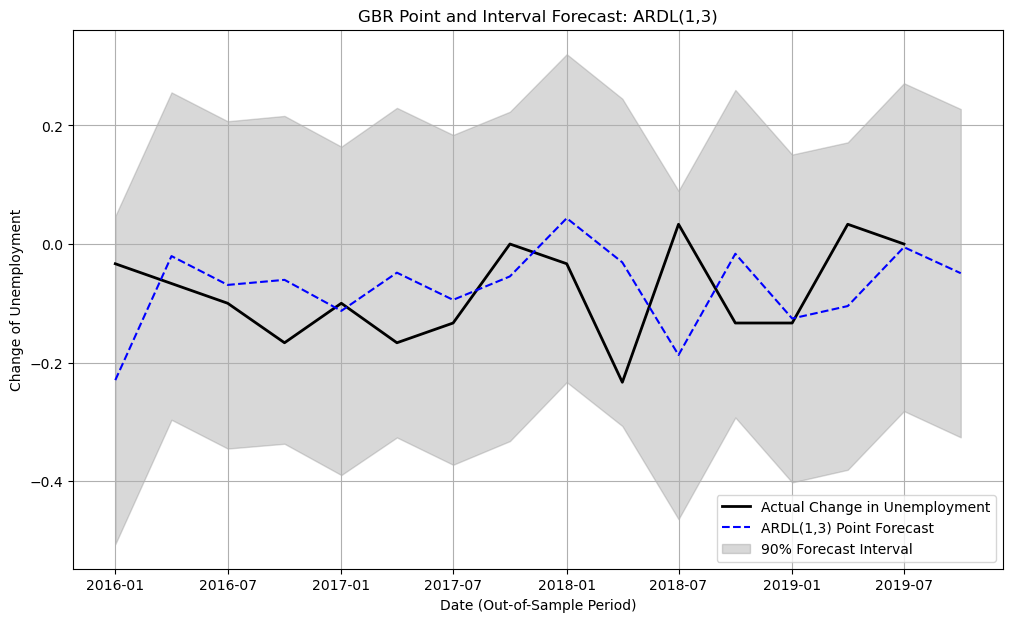

In [26]:
# --- Model 1: ARDL(1,3) Forecast (GBR) ---
print("--- Generating Forecast for ARDL(1,3) (GBR) ---")

# 1. Define the *exact same* X variables used to train this model
# X_vars_ardl_1_3_gbr was defined in Q2
X_oos_ardl_1_3_gbr = sm.add_constant(df_oos_gbr[X_vars_ardl_1_3_gbr])

# 2. Get the forecast results (using the model from Q2)
try:
    forecast_results_1_gbr = model_ardl_1_3_gbr.get_prediction(X_oos_ardl_1_3_gbr)
except NameError:
    print("ERROR: 'model_ardl_1_3_gbr' is not defined. Please re-run Q2 (GBR) - Code Cell 2 first.")

# 3. Get the forecast summary frame (90% confidence interval)
forecast_summary_1_gbr = forecast_results_1_gbr.summary_frame(alpha=0.10)

# 4. Create results table
results_df_1_gbr = pd.DataFrame({
    'qdate': Y_oos_actual_gbr.index,
    'dunemp_GBR': Y_oos_actual_gbr.values,
    'dunemp_GBR_hat1': forecast_summary_1_gbr['mean'].values,
    'dunemp_GBR_lb1': forecast_summary_1_gbr['obs_ci_lower'].values,
    'dunemp_GBR_ub1': forecast_summary_1_gbr['obs_ci_upper'].values
})
results_df_1_gbr.set_index('qdate', inplace=True)

print("Forecast Table (ARDL(1,3) - GBR):")
print(results_df_1_gbr)

# 5. Plot the forecast
plt.figure(figsize=(12, 7))
plt.plot(results_df_1_gbr.index, results_df_1_gbr['dunemp_GBR'], label='Actual Change in Unemployment', color='black', linewidth=2)
plt.plot(results_df_1_gbr.index, results_df_1_gbr['dunemp_GBR_hat1'], label='ARDL(1,3) Point Forecast', color='blue', linestyle='--')
plt.fill_between(results_df_1_gbr.index, 
                 results_df_1_gbr['dunemp_GBR_lb1'], 
                 results_df_1_gbr['dunemp_GBR_ub1'], 
                 color='gray', alpha=0.3, label='90% Forecast Interval')

plt.title('GBR Point and Interval Forecast: ARDL(1,3)')
plt.xlabel('Date (Out-of-Sample Period)')
plt.ylabel('Change of Unemployment')
plt.legend()
plt.grid(True)

# 6. Export the graph
output_path = os.path.join(output_dir, 'Q3_GBR_graph_ARDL13.png')
plt.savefig(output_path)
print(f"\nGraph saved to {output_path}")

plt.show()


--- Generating Forecast for AR(4) (GBR) ---
Forecast Table (AR(4) - GBR):
            dunemp_GBR  dunemp_GBR_hat3  dunemp_GBR_lb3  dunemp_GBR_ub3
qdate                                                                  
2016-01-01   -0.033333        -0.227657       -0.520981        0.065667
2016-04-01   -0.066667        -0.084697       -0.376792        0.207398
2016-07-01   -0.100000        -0.045846       -0.333656        0.241964
2016-10-01   -0.166667        -0.073278       -0.361105        0.214549
2017-01-01   -0.100000        -0.125482       -0.411044        0.160081
2017-04-01   -0.166667        -0.094810       -0.380225        0.190604
2017-07-01   -0.133334        -0.140973       -0.426592        0.144646
2017-10-01    0.000000        -0.123780       -0.409393        0.161833
2018-01-01   -0.033333        -0.009847       -0.296040        0.276346
2018-04-01   -0.233333        -0.013801       -0.299886        0.272285
2018-07-01    0.033333        -0.173977       -0.461684      

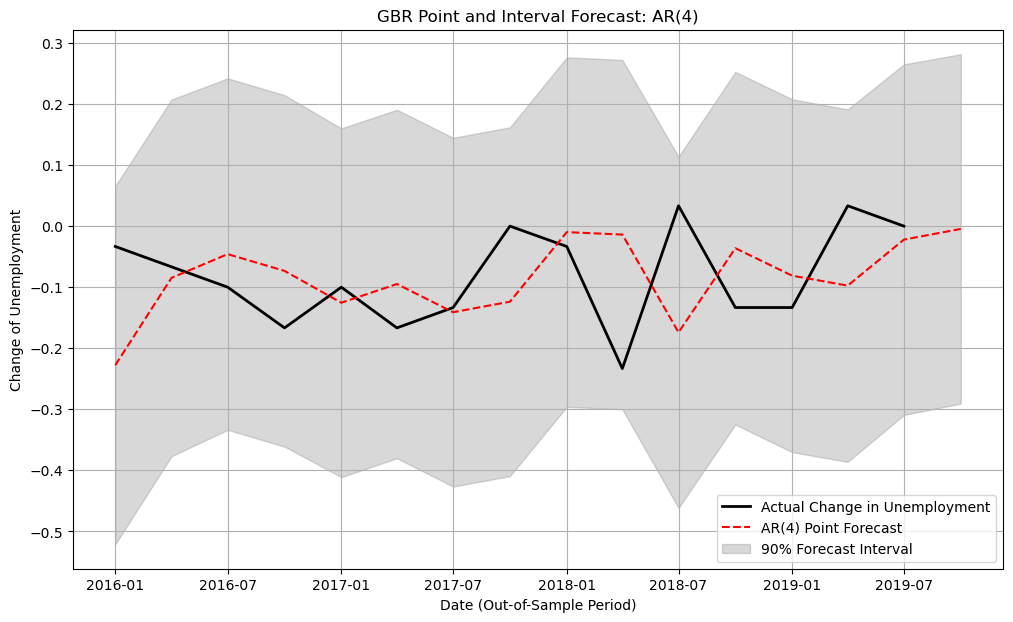

In [27]:
# --- Model 3: AR(4) Forecast (GBR) ---
print("\n--- Generating Forecast for AR(4) (GBR) ---")

# 1. Define X variables
X_oos_ar_4_gbr = sm.add_constant(df_oos_gbr[X_vars_ar_4_gbr])

# 2. Get forecast results
try:
    forecast_results_3_gbr = model_ar_4_gbr.get_prediction(X_oos_ar_4_gbr)
except NameError:
    print("ERROR: 'model_ar_4_gbr' is not defined. Please re-run Q2 (GBR) - Code Cell 4 first.")

# 3. Get summary frame
forecast_summary_3_gbr = forecast_results_3_gbr.summary_frame(alpha=0.10)

# 4. Create results table
results_df_3_gbr = pd.DataFrame({
    'qdate': Y_oos_actual_gbr.index,
    'dunemp_GBR': Y_oos_actual_gbr.values,
    'dunemp_GBR_hat3': forecast_summary_3_gbr['mean'].values,
    'dunemp_GBR_lb3': forecast_summary_3_gbr['obs_ci_lower'].values,
    'dunemp_GBR_ub3': forecast_summary_3_gbr['obs_ci_upper'].values
})
results_df_3_gbr.set_index('qdate', inplace=True)

print("Forecast Table (AR(4) - GBR):")
print(results_df_3_gbr)

# 5. Plot
plt.figure(figsize=(12, 7))
plt.plot(results_df_3_gbr.index, results_df_3_gbr['dunemp_GBR'], label='Actual Change in Unemployment', color='black', linewidth=2)
plt.plot(results_df_3_gbr.index, results_df_3_gbr['dunemp_GBR_hat3'], label='AR(4) Point Forecast', color='red', linestyle='--')
plt.fill_between(results_df_3_gbr.index, 
                 results_df_3_gbr['dunemp_GBR_lb3'], 
                 results_df_3_gbr['dunemp_GBR_ub3'], 
                 color='gray', alpha=0.3, label='90% Forecast Interval')

plt.title('GBR Point and Interval Forecast: AR(4)')
plt.xlabel('Date (Out-of-Sample Period)')
plt.ylabel('Change of Unemployment')
plt.legend()
plt.grid(True)

# 6. Export
output_path = os.path.join(output_dir, 'Q3_GBR_graph_AR4.png')
plt.savefig(output_path)
print(f"\nGraph saved to {output_path}")

plt.show()


--- Generating Forecast for ARDL(2,3) (GBR) ---
Forecast Table (ARDL(2,3) - GBR):
            dunemp_GBR  dunemp_GBR_hat2  dunemp_GBR_lb2  dunemp_GBR_ub2
qdate                                                                  
2016-01-01   -0.033333        -0.235471       -0.510548        0.039606
2016-04-01   -0.066667        -0.054344       -0.330776        0.222088
2016-07-01   -0.100000        -0.064175       -0.338478        0.210127
2016-10-01   -0.166667        -0.055107       -0.329873        0.219659
2017-01-01   -0.100000        -0.103751       -0.379089        0.171586
2017-04-01   -0.166667        -0.050661       -0.326831        0.225508
2017-07-01   -0.133334        -0.082225       -0.358879        0.194429
2017-10-01    0.000000        -0.059293       -0.335317        0.216730
2018-01-01   -0.033333         0.028365       -0.246859        0.303590
2018-04-01   -0.233333        -0.025333       -0.299669        0.249004
2018-07-01    0.033333        -0.167349       -0.4432

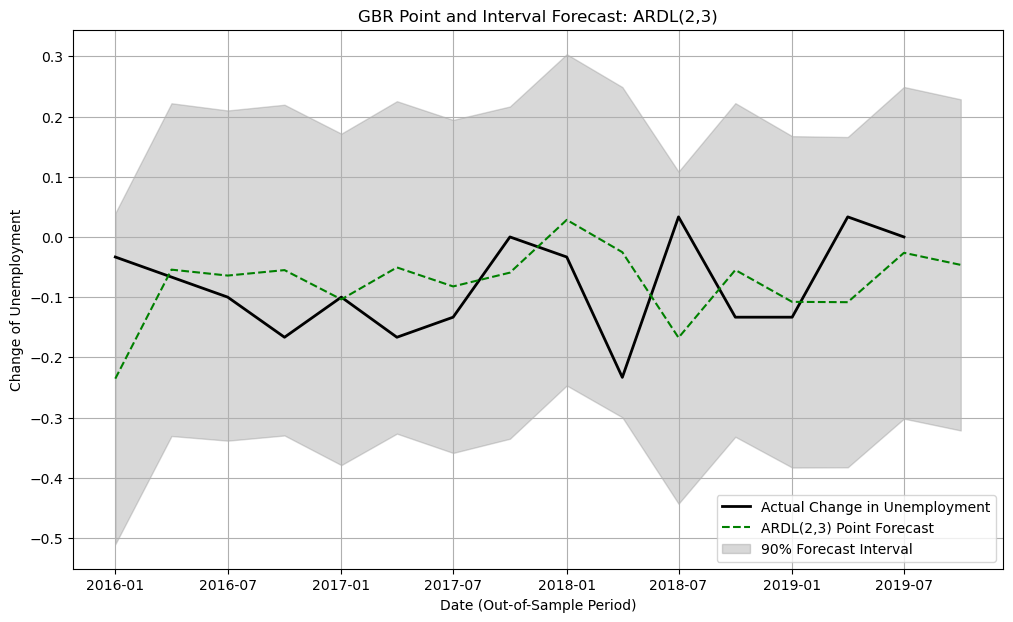

In [28]:
# --- Model 2: ARDL(2,3) Forecast (GBR) ---
print("\n--- Generating Forecast for ARDL(2,3) (GBR) ---")

# 1. Define X variables
X_oos_ardl_2_3_gbr = sm.add_constant(df_oos_gbr[X_vars_ardl_2_3_gbr])

# 2. Get forecast results
try:
    forecast_results_2_gbr = model_ardl_2_3_gbr.get_prediction(X_oos_ardl_2_3_gbr)
except NameError:
    print("ERROR: 'model_ardl_2_3_gbr' is not defined. Please re-run Q2 (GBR) - Code Cell 3 first.")

# 3. Get summary frame
forecast_summary_2_gbr = forecast_results_2_gbr.summary_frame(alpha=0.10)

# 4. Create results table
results_df_2_gbr = pd.DataFrame({
    'qdate': Y_oos_actual_gbr.index,
    'dunemp_GBR': Y_oos_actual_gbr.values,
    'dunemp_GBR_hat2': forecast_summary_2_gbr['mean'].values,
    'dunemp_GBR_lb2': forecast_summary_2_gbr['obs_ci_lower'].values,
    'dunemp_GBR_ub2': forecast_summary_2_gbr['obs_ci_upper'].values
})
results_df_2_gbr.set_index('qdate', inplace=True)

print("Forecast Table (ARDL(2,3) - GBR):")
print(results_df_2_gbr)

# 5. Plot
plt.figure(figsize=(12, 7))
plt.plot(results_df_2_gbr.index, results_df_2_gbr['dunemp_GBR'], label='Actual Change in Unemployment', color='black', linewidth=2)
plt.plot(results_df_2_gbr.index, results_df_2_gbr['dunemp_GBR_hat2'], label='ARDL(2,3) Point Forecast', color='green', linestyle='--')
plt.fill_between(results_df_2_gbr.index, 
                 results_df_2_gbr['dunemp_GBR_lb2'], 
                 results_df_2_gbr['dunemp_GBR_ub2'], 
                 color='gray', alpha=0.3, label='90% Forecast Interval')

plt.title('GBR Point and Interval Forecast: ARDL(2,3)')
plt.xlabel('Date (Out-of-Sample Period)')
plt.ylabel('Change of Unemployment')
plt.legend()
plt.grid(True)

# 6. Export
output_path = os.path.join(output_dir, 'Q3_GBR_graph_ARDL23.png')
plt.savefig(output_path)
print(f"\nGraph saved to {output_path}")

plt.show()


--- Generating Combined Forecast Plot (GBR) ---
Combined graph saved to Output\Q3_GBR_graph_ARDLs&AR.png


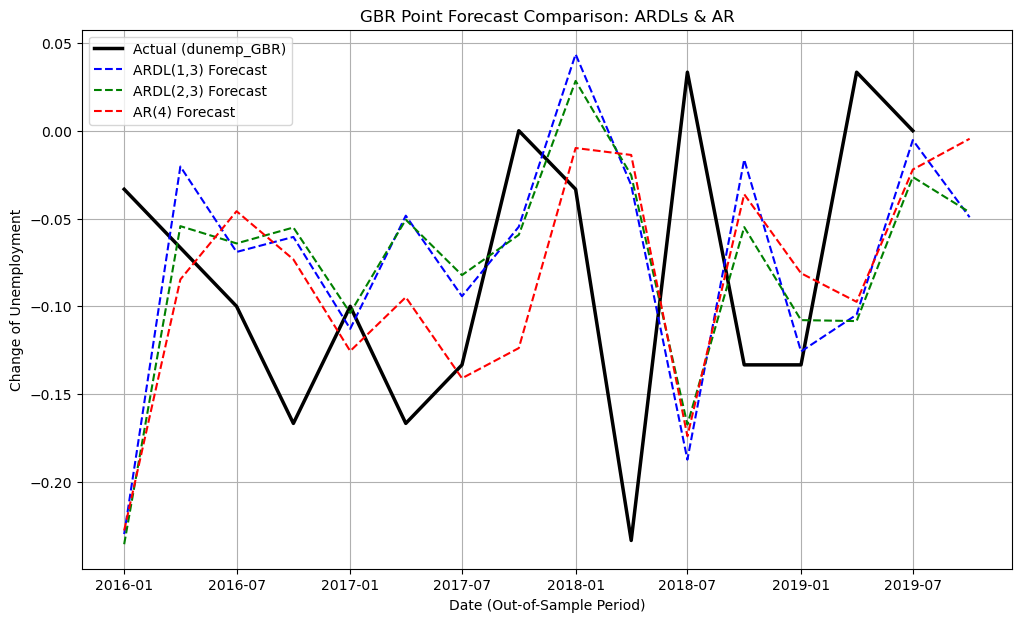

In [29]:
# --- Q3 (GBR): Combined Point Forecast Plot ---
print("\n--- Generating Combined Forecast Plot (GBR) ---")

plt.figure(figsize=(12, 7))

# Plot actual values (black)
plt.plot(Y_oos_actual_gbr.index, Y_oos_actual_gbr, label='Actual (dunemp_GBR)', color='black', linewidth=2.5)

# Plot ARDL(1,3) forecast (blue)
plt.plot(results_df_1_gbr.index, results_df_1_gbr['dunemp_GBR_hat1'], label='ARDL(1,3) Forecast', color='blue', linestyle='--')

# Plot ARDL(2,3) forecast (green)
plt.plot(results_df_2_gbr.index, results_df_2_gbr['dunemp_GBR_hat2'], label='ARDL(2,3) Forecast', color='green', linestyle='--')

# Plot AR(4) forecast (red)
plt.plot(results_df_3_gbr.index, results_df_3_gbr['dunemp_GBR_hat3'], label='AR(4) Forecast', color='red', linestyle='--')

# Add labels and title
plt.title('GBR Point Forecast Comparison: ARDLs & AR')
plt.xlabel('Date (Out-of-Sample Period)')
plt.ylabel('Change of Unemployment')
plt.legend()
plt.grid(True)

# Export the graph
output_path = os.path.join(output_dir, 'Q3_GBR_graph_ARDLs&AR.png')
plt.savefig(output_path)
print(f"Combined graph saved to {output_path}")

plt.show()

In [30]:
# Import the function for Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

# --- Q4 (GBR): Calculate Mean Squared Error (MSE) for GBR Forecasts (Final Version) ---
# This matches your new Stata code for 'summ u1_sqr'
print("--- Calculating GBR Forecast Accuracy (MSE) ---")

try:
    # --- ARDL(1,3) ---
    # We use the '..._clean' dataframes from the previous (MAE) step to avoid NaN errors
    results_df_1_gbr_clean = results_df_1_gbr.dropna()
    mse_1_gbr = mean_squared_error(results_df_1_gbr_clean['dunemp_GBR'], results_df_1_gbr_clean['dunemp_GBR_hat1'])
    print(f"\nModel: ARDL(1,3) (GBR)")
    print(f"  Mean Squared Error (MSE): {mse_1_gbr:.4f}")

    # --- ARDL(2,3) ---
    results_df_2_gbr_clean = results_df_2_gbr.dropna()
    mse_2_gbr = mean_squared_error(results_df_2_gbr_clean['dunemp_GBR'], results_df_2_gbr_clean['dunemp_GBR_hat2'])
    print(f"\nModel: ARDL(2,3) (GBR)")
    print(f"  Mean Squared Error (MSE): {mse_2_gbr:.4f}")

    # --- AR(4) ---
    results_df_3_gbr_clean = results_df_3_gbr.dropna()
    mse_3_gbr = mean_squared_error(results_df_3_gbr_clean['dunemp_GBR'], results_df_3_gbr_clean['dunemp_GBR_hat3'])
    print(f"\nModel: AR(4) (GBR)")
    print(f"  Mean Squared Error (MSE): {mse_3_gbr:.4f}")

    # --- Create Summary Table ---
    mse_summary_data_gbr = {
        'ARDL(1,3)': mse_1_gbr,
        'ARDL(2,3)': mse_2_gbr,
        'AR(4)': mse_3_gbr
    }
    
    mse_summary_df_gbr = pd.DataFrame(mse_summary_data_gbr, index=['Mean Squared Error (MSE)'])

    print("\n\n--- Forecast Evaluation Summary (GBR) ---")
    print(mse_summary_df_gbr.round(4))

    # --- Export the summary table to CSV ---
    output_path = os.path.join(output_dir, 'Q4_GBR_forecast_MSE.csv')
    mse_summary_df_gbr.to_csv(output_path)
    
    print(f"\nMSE summary table saved to {output_path}")
    print("\n\n--- All Project Code Conversion Complete! ---")

except NameError as e:
    print(f"\nERROR: A DataFrame from Q3 (GBR) is missing (e.g., 'results_df_1_gbr').")
    print("Please make sure you have successfully run all code cells from Q3 (GBR) first.")

--- Calculating GBR Forecast Accuracy (MSE) ---

Model: ARDL(1,3) (GBR)
  Mean Squared Error (MSE): 0.0133

Model: ARDL(2,3) (GBR)
  Mean Squared Error (MSE): 0.0126

Model: AR(4) (GBR)
  Mean Squared Error (MSE): 0.0128


--- Forecast Evaluation Summary (GBR) ---
                          ARDL(1,3)  ARDL(2,3)   AR(4)
Mean Squared Error (MSE)     0.0133     0.0126  0.0128

MSE summary table saved to Output\Q4_GBR_forecast_MSE.csv


--- All Project Code Conversion Complete! ---
